In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from torch import nn
from tqdm import tqdm

Loading Dataset

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Splitting data into features and dependent variables

In [4]:
X = df['area']
y = df['price']

Splitting into test and training sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size =0.2, random_state=0)


## Feature Scaling
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min())
y_train = (y_train - y_train.min()) / (y_train.max() - y_train.min())
y_test = (y_test - y_test.min()) / (y_test.max() - y_test.min())

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(type(X_train), type(X_test), type(y_train), type(y_test))

X_train = torch.tensor(X_train.values).type(torch.float32)
X_test = torch.tensor(X_test.values).type(torch.float32)
y_train = torch.tensor(y_train.values).type(torch.float32)
y_test = torch.tensor(y_test.values).type(torch.float32)


(436,) (109,) (436,) (109,)
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


Creating our Linear Regression Model

In [6]:
class LinearRegression(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.weight = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))   
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # return 1/(1+torch.exp(-self.weight * x + self.bias))
        return self.weight * x + self.bias

In [7]:
model = LinearRegression()
model.state_dict()

OrderedDict([('weight', tensor([1.4765])), ('bias', tensor([-0.4520]))])

In [8]:
# Loss function
loss_fn = nn.MSELoss()

#Optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [9]:
### Training Loop
torch.manual_seed(42)

epochs = 1000

for epoch in tqdm(range(epochs)):
    # Set our model to training mode
    model.train()
    
    #Forward pass
    y_pred = model(X_train)
    
    #Calculating loss
    loss = loss_fn(y_pred, y_train)
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')
    
    #Optimiser zero grad
    optimizer.zero_grad()
    
    #Backward propagation
    loss.backward()
    
    #Step the optimiser - perform gradient descent
    optimizer.step()
    
    model.eval()

 18%|█▊        | 182/1000 [00:00<00:00, 916.95it/s]

Epoch 0, Loss: 0.1763
Epoch 10, Loss: 0.1290
Epoch 20, Loss: 0.0980
Epoch 30, Loss: 0.0777
Epoch 40, Loss: 0.0644
Epoch 50, Loss: 0.0556
Epoch 60, Loss: 0.0499
Epoch 70, Loss: 0.0460
Epoch 80, Loss: 0.0435
Epoch 90, Loss: 0.0418
Epoch 100, Loss: 0.0406
Epoch 110, Loss: 0.0398
Epoch 120, Loss: 0.0392
Epoch 130, Loss: 0.0387
Epoch 140, Loss: 0.0384
Epoch 150, Loss: 0.0381
Epoch 160, Loss: 0.0379
Epoch 170, Loss: 0.0377
Epoch 180, Loss: 0.0375


 37%|███▋      | 368/1000 [00:00<00:00, 884.78it/s]

Epoch 190, Loss: 0.0373
Epoch 200, Loss: 0.0372
Epoch 210, Loss: 0.0370
Epoch 220, Loss: 0.0369
Epoch 230, Loss: 0.0367
Epoch 240, Loss: 0.0366
Epoch 250, Loss: 0.0364
Epoch 260, Loss: 0.0363
Epoch 270, Loss: 0.0361
Epoch 280, Loss: 0.0360
Epoch 290, Loss: 0.0359
Epoch 300, Loss: 0.0357
Epoch 310, Loss: 0.0356
Epoch 320, Loss: 0.0355
Epoch 330, Loss: 0.0353
Epoch 340, Loss: 0.0352
Epoch 350, Loss: 0.0351
Epoch 360, Loss: 0.0349


 46%|████▌     | 458/1000 [00:00<00:00, 886.98it/s]

Epoch 370, Loss: 0.0348
Epoch 380, Loss: 0.0347
Epoch 390, Loss: 0.0345
Epoch 400, Loss: 0.0344
Epoch 410, Loss: 0.0343
Epoch 420, Loss: 0.0342
Epoch 430, Loss: 0.0341
Epoch 440, Loss: 0.0339
Epoch 450, Loss: 0.0338
Epoch 460, Loss: 0.0337
Epoch 470, Loss: 0.0336
Epoch 480, Loss: 0.0335
Epoch 490, Loss: 0.0333
Epoch 500, Loss: 0.0332
Epoch 510, Loss: 0.0331
Epoch 520, Loss: 0.0330
Epoch 530, Loss: 0.0329


 72%|███████▏  | 723/1000 [00:00<00:00, 854.60it/s]

Epoch 540, Loss: 0.0328
Epoch 550, Loss: 0.0327
Epoch 560, Loss: 0.0326
Epoch 570, Loss: 0.0324
Epoch 580, Loss: 0.0323
Epoch 590, Loss: 0.0322
Epoch 600, Loss: 0.0321
Epoch 610, Loss: 0.0320
Epoch 620, Loss: 0.0319
Epoch 630, Loss: 0.0318
Epoch 640, Loss: 0.0317
Epoch 650, Loss: 0.0316
Epoch 660, Loss: 0.0315
Epoch 670, Loss: 0.0314
Epoch 680, Loss: 0.0313
Epoch 690, Loss: 0.0312
Epoch 700, Loss: 0.0311
Epoch 710, Loss: 0.0310
Epoch 720, Loss: 0.0309


 81%|████████  | 809/1000 [00:00<00:00, 833.54it/s]

Epoch 730, Loss: 0.0308
Epoch 740, Loss: 0.0307
Epoch 750, Loss: 0.0306
Epoch 760, Loss: 0.0305
Epoch 770, Loss: 0.0305
Epoch 780, Loss: 0.0304
Epoch 790, Loss: 0.0303
Epoch 800, Loss: 0.0302
Epoch 810, Loss: 0.0301
Epoch 820, Loss: 0.0300
Epoch 830, Loss: 0.0299
Epoch 840, Loss: 0.0298
Epoch 850, Loss: 0.0298
Epoch 860, Loss: 0.0297
Epoch 870, Loss: 0.0296
Epoch 880, Loss: 0.0295
Epoch 890, Loss: 0.0294


100%|██████████| 1000/1000 [00:01<00:00, 855.06it/s]

Epoch 900, Loss: 0.0293
Epoch 910, Loss: 0.0293
Epoch 920, Loss: 0.0292
Epoch 930, Loss: 0.0291
Epoch 940, Loss: 0.0290
Epoch 950, Loss: 0.0289
Epoch 960, Loss: 0.0289
Epoch 970, Loss: 0.0288
Epoch 980, Loss: 0.0287
Epoch 990, Loss: 0.0286


In [10]:
### Testing loop
torch.manual_seed(42)

for epoch in range(epochs):
    with torch.inference_mode():
        test_pred = model(X_test)
        
        #Checking the test loss
        test_Loss = loss_fn(test_pred, y_test)
    

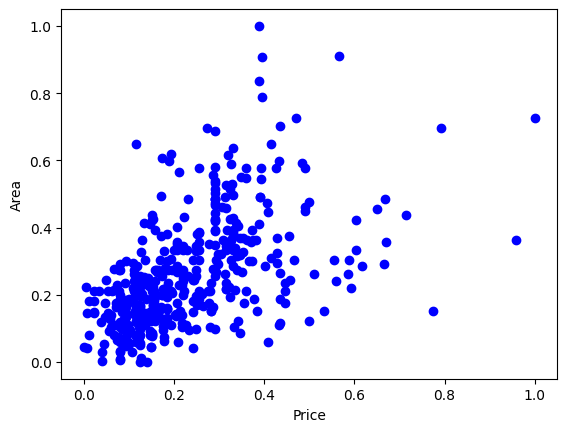

In [11]:
###Plotting our predictions
plt.scatter(X_train, y_train, label = 'Training data' ,color ='blue')
plt.xlabel('Price')
plt.ylabel('Area')
plt.show()

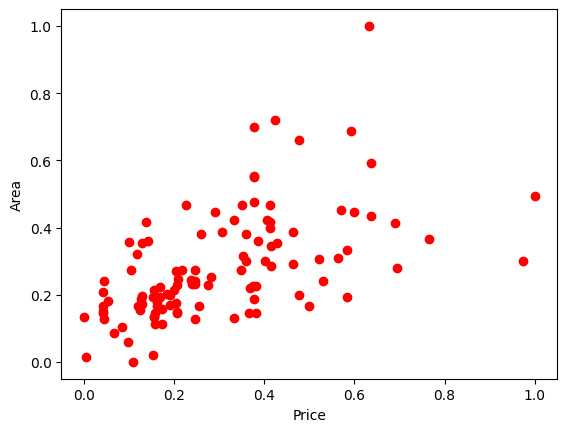

In [12]:
plt.scatter(X_test, y_test, label = 'Testing data' ,color ='red')
plt.xlabel('Price')
plt.ylabel('Area')
plt.show()

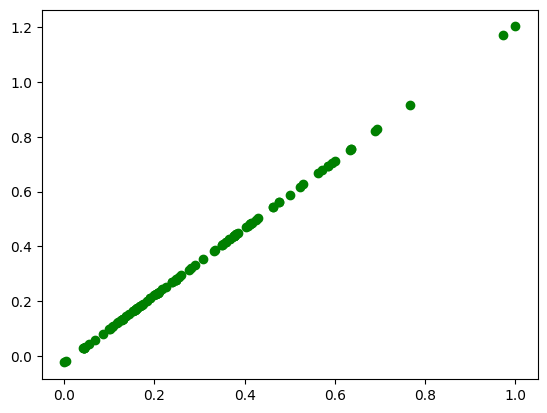

In [13]:
with torch.inference_mode():
    y_pred = model(X_test)
plt.scatter(X_test,y_pred, label = 'Training data' ,color ='green')

In [14]:
print("GPU is available: ", torch.cuda.is_available())

GPU is available:  True


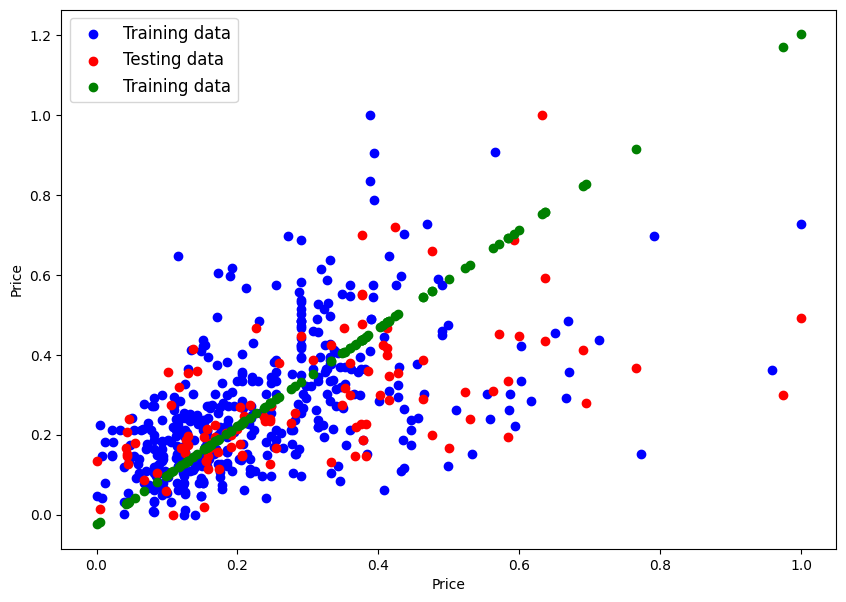

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, label = 'Training data' ,color ='blue')
plt.scatter(X_test, y_test, label = 'Testing data' ,color ='red')
plt.scatter(X_test,y_pred, label = 'Training data' ,color ='green')
plt.xlabel('Price')
plt.ylabel('Price')
plt.legend(prop={'size':12})
plt.show()


In [16]:
import torch
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'